# EDA and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.info() # helps to check whether we have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


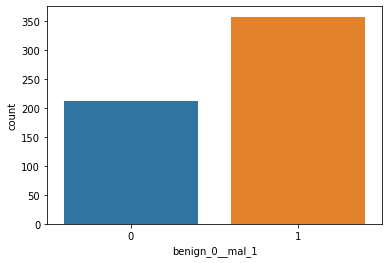

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

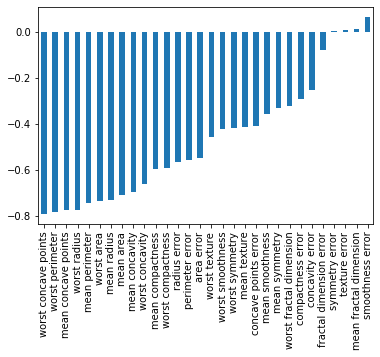

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

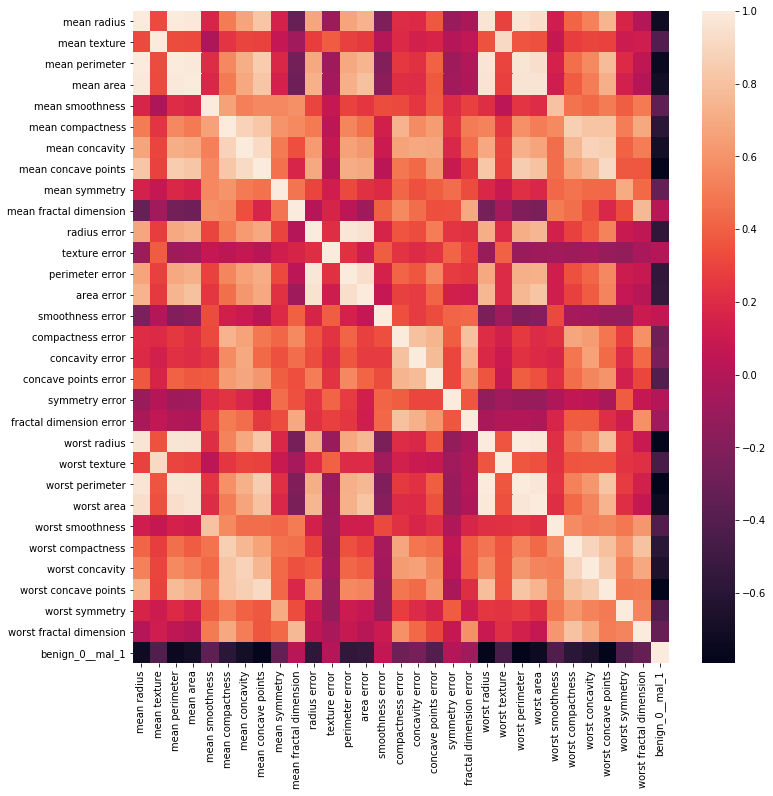

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 492us/sample - loss: 0.6779 - val_loss: 0.6638
Epoch 2/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6502 - val_loss: 0.6370
Epoch 3/600
426/426 [==============================] - 0s 53us/sample - loss: 0.6228 - val_loss: 0.6078
Epoch 4/600
426/426 [==============================] - 0s 85us/sample - loss: 0.5901 - val_loss: 0.5705
Epoch 5/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5515 - val_loss: 0.5253
Epoch 6/600
426/426 [==============================] - 0s 58us/sample - loss: 0.5045 - val_loss: 0.4735
Epoch 7/600
426/426 [==============================] - 0s 52us/sample - loss: 0.4519 - val_loss: 0.4190
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4009 - val_loss: 0.3670
Epoch 9/600
426/426 [======

426/426 [==============================] - 0s 50us/sample - loss: 0.0518 - val_loss: 0.1046
Epoch 76/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0504 - val_loss: 0.1044
Epoch 77/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0518 - val_loss: 0.1070
Epoch 78/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0485 - val_loss: 0.1056
Epoch 79/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0483 - val_loss: 0.1135
Epoch 80/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0474 - val_loss: 0.1072
Epoch 81/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0487 - val_loss: 0.1089
Epoch 82/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0500 - val_loss: 0.1150
Epoch 83/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0488 - val_loss: 0.1058
Epoch 84/600
426/426 [==============================] - 0s 40us/samp

426/426 [==============================] - 0s 46us/sample - loss: 0.0334 - val_loss: 0.1406
Epoch 153/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0333 - val_loss: 0.1270
Epoch 154/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0337 - val_loss: 0.1333
Epoch 155/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0313 - val_loss: 0.1243
Epoch 156/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0309 - val_loss: 0.1384
Epoch 157/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0304 - val_loss: 0.1293
Epoch 158/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0297 - val_loss: 0.1295
Epoch 159/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0302 - val_loss: 0.1274
Epoch 160/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0360 - val_loss: 0.1338
Epoch 161/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 47us/sample - loss: 0.0187 - val_loss: 0.1488
Epoch 230/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0177 - val_loss: 0.1385
Epoch 231/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0178 - val_loss: 0.1477
Epoch 232/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0192 - val_loss: 0.1427
Epoch 233/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0184 - val_loss: 0.1456
Epoch 234/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0189 - val_loss: 0.1487
Epoch 235/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0182 - val_loss: 0.1360
Epoch 236/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0197 - val_loss: 0.1416
Epoch 237/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0202 - val_loss: 0.1420
Epoch 238/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 42us/sample - loss: 0.0104 - val_loss: 0.1689
Epoch 306/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0108 - val_loss: 0.1712
Epoch 307/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0105 - val_loss: 0.1648
Epoch 308/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0103 - val_loss: 0.1805
Epoch 309/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0107 - val_loss: 0.1650
Epoch 310/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0106 - val_loss: 0.1702
Epoch 311/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0099 - val_loss: 0.1766
Epoch 312/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0109 - val_loss: 0.1732
Epoch 313/600
426/426 [==============================] - 0s 38us/sample - loss: 0.0100 - val_loss: 0.1844
Epoch 314/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 40us/sample - loss: 0.0066 - val_loss: 0.2093
Epoch 383/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0061 - val_loss: 0.2055
Epoch 384/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0064 - val_loss: 0.2136
Epoch 385/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0065 - val_loss: 0.2178
Epoch 386/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0063 - val_loss: 0.2151
Epoch 387/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0059 - val_loss: 0.2041
Epoch 388/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0073 - val_loss: 0.2223
Epoch 389/600
426/426 [==============================] - 0s 48us/sample - loss: 0.0066 - val_loss: 0.2218
Epoch 390/600
426/426 [==============================] - 0s 41us/sample - loss: 0.0063 - val_loss: 0.2051
Epoch 391/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 42us/sample - loss: 0.0037 - val_loss: 0.2482
Epoch 460/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0037 - val_loss: 0.2439
Epoch 461/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0035 - val_loss: 0.2459
Epoch 462/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0035 - val_loss: 0.2487
Epoch 463/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0034 - val_loss: 0.2561
Epoch 464/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0035 - val_loss: 0.2540
Epoch 465/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0034 - val_loss: 0.2573
Epoch 466/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0037 - val_loss: 0.2434
Epoch 467/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0041 - val_loss: 0.2815
Epoch 468/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 44us/sample - loss: 0.0025 - val_loss: 0.2874
Epoch 537/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0021 - val_loss: 0.3080
Epoch 538/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0022 - val_loss: 0.3008
Epoch 539/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0020 - val_loss: 0.2960
Epoch 540/600
426/426 [==============================] - 0s 43us/sample - loss: 0.0029 - val_loss: 0.3431
Epoch 541/600
426/426 [==============================] - 0s 45us/sample - loss: 0.0022 - val_loss: 0.3025
Epoch 542/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0020 - val_loss: 0.3190
Epoch 543/600
426/426 [==============================] - 0s 46us/sample - loss: 0.0024 - val_loss: 0.2981
Epoch 544/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0022 - val_loss: 0.3161
Epoch 545/600
426/426 [==============================] - 0s 

In [27]:
losses = pd.DataFrame(model.history.history)

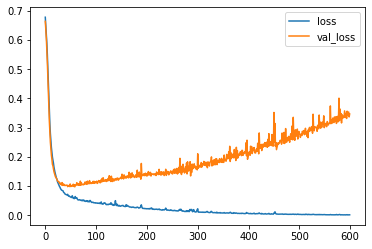

In [28]:
losses.plot()

In [33]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 492us/sample - loss: 0.6822 - val_loss: 0.6692
Epoch 2/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6547 - val_loss: 0.6402
Epoch 3/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6256 - val_loss: 0.6121
Epoch 4/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5945 - val_loss: 0.5805
Epoch 5/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5625 - val_loss: 0.5447
Epoch 6/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5234 - val_loss: 0.5024
Epoch 7/600
426/426 [==============================] - 0s 54us/sample - loss: 0.4781 - val_loss: 0.4524
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4295 - val_loss: 0.4017
Epoch 9/600
426/426 [==============================] - 0s 54us/sample - loss: 0.3834 - val_loss: 0.3562
Epoch 10/600
426/

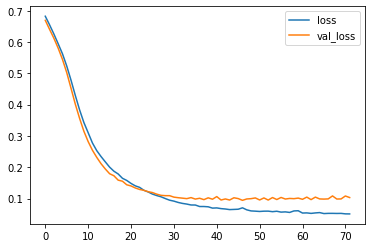

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 778us/sample - loss: 0.7304 - val_loss: 0.6895
Epoch 2/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6857 - val_loss: 0.6731
Epoch 3/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6773 - val_loss: 0.6619
Epoch 4/600
426/426 [==============================] - 0s 64us/sample - loss: 0.6703 - val_loss: 0.6451
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6541 - val_loss: 0.6257
Epoch 6/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6396 - val_loss: 0.6065
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6266 - val_loss: 0.5862
Epoch 8/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6095 - val_loss: 0.5655
Epoch 9/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5762 - val_loss: 0.5378
Epoch 10/600
426

426/426 [==============================] - 0s 52us/sample - loss: 0.1129 - val_loss: 0.0985
Epoch 79/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1136 - val_loss: 0.1057
Epoch 80/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1212 - val_loss: 0.0858
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1102 - val_loss: 0.0939
Epoch 82/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1391 - val_loss: 0.0950
Epoch 83/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1149 - val_loss: 0.0927
Epoch 84/600
426/426 [==============================] - 0s 52us/sample - loss: 0.1116 - val_loss: 0.0988
Epoch 85/600
426/426 [==============================] - 0s 47us/sample - loss: 0.1398 - val_loss: 0.0914
Epoch 86/600
426/426 [==============================] - 0s 54us/sample - loss: 0.1201 - val_loss: 0.0863
Epoch 87/600
426/426 [==============================] - 0s 52us/samp

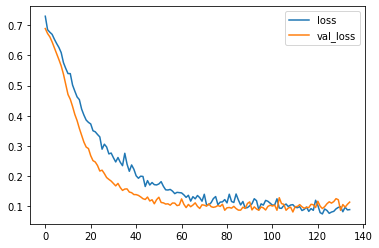

In [41]:
model_loss2 = pd.DataFrame(model.history.history)
model_loss2.plot()

In [43]:
predictions = model.predict_classes(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [46]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]
